In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
url= "https://www.seoul.go.kr/coronaV/coronaStatus.do"

In [145]:
# read_html 은 사이트 내의 html 태그를 불러옵니다.
table = pd.read_html(url)

# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.
df=table[5]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [52]:
import requests
url= "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&columns[0][data]=0"
#url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
url = f"{url}&start=100&length=100&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1634131509153"

response=requests.get(url)

In [53]:
data_json=response.json()

In [54]:
import time
from tqdm import trange

In [55]:
def get_seoul_covid19_100001_currnet(page_no):
  ''' 
  page no: 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
  start no: 입력받은  page_no로
  '''
  start_no=(page_no-1)*100
  url= f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw{page_no}"
  #url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
  url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
  
  response=requests.get(url)
  data_json = response.json()
  return data_json


In [56]:
def get_multi_page_list_100001_currnet(start_page,end_page=80):

  page_list=[]
  for page_no in trange(start_page,end_page+1):
    one_page_data_json =get_seoul_covid19_100001_currnet(page_no)
    if len(one_page_data_json["data"])>0:
        one_page_df =pd.DataFrame(one_page_data_json["data"])
        page_list.append(one_page_df)
        time.sleep(0.5)
    else:
      return page_list
  
  return page_list



In [57]:
start_page=1
end_page= 610

page_list= get_multi_page_list_100001_currnet(start_page, end_page) 
df_all_10001_current=pd.concat(page_list)

df_all_10001_current.columns = table[5].columns.tolist()
df_all_10001_current.head()

100%|██████████| 610/610 [18:19<00:00,  1.80s/it]


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>133513</p>,397855,2021-11-15,성북구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>133512</p>,397856,2021-11-15,동대문구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>133511</p>,398211,2021-11-15,도봉구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>133510</p>,397773,2021-11-15,동대문구,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>133509</p>,398465,2021-11-15,구로구,-,기타 확진자 접촉,<b class=''>-</b>


In [58]:
df_all=pd.concat(page_list)

In [60]:
cols = df.columns.tolist()

In [61]:
df_all.columns = cols

In [62]:
import re
def extract_number(num_string):
  if type(num_string)==str:
    num_string=num_string.replace("corona19","")
    num=re.sub("[^0-9]","",num_string)
    num=int(num)
    return num
  else:
    return num_string

In [63]:
num_string ="<p class='corona19_no'>109940</p>"

109940

In [64]:
df_all["연번"]=df_all["연번"].map(extract_number)

In [65]:
def extract_hangeul(origin_text):
  subtract_text=re.sub("[^가-힣]","",origin_text)
  return subtract_text

In [66]:
extract_hangeul("<b class='status1'>기타</b>")

'기타'

In [67]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [68]:
extract_hangeul("<b class=''></b>")

''

In [70]:
df.all

<bound method DataFrame.all of Empty DataFrame
Columns: [연번, 환자, 확진일, 거주지, 여행력, 접촉력, 퇴원현황]
Index: []>

In [71]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    41473
<b class='status1'>-</b>     14313
<b class=''>-</b>             4131
<b class='status2'>-</b>       797
<b class='status2'>사망</b>      286
Name: 퇴원현황, dtype: int64

In [72]:
df_all.loc[df_all["퇴원현황"].str.contains("퇴원"),"퇴원현황"]="퇴원"
df_all.loc[df_all["퇴원현황"].str.contains("사망"),"퇴원현황"]="사망"
df_all.loc[~df_all["퇴원현황"].str.contains("퇴원|사망"),"퇴원현황"] = np.nan
df_all["퇴원현황"].value_counts()

퇴원    41473
사망      286
Name: 퇴원현황, dtype: int64

In [73]:
df_all["퇴원현황"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
95     퇴원
96     퇴원
97     퇴원
98     퇴원
99     퇴원
Name: 퇴원현황, Length: 61000, dtype: object

In [74]:
last_date = df_all.iloc[0]["확진일"]
last_date

'2021-11-15'

In [75]:
#마지막 확진일을 파일명에 써주기 위해.을 _로 변경합니다.
#확장자와 구분이 쉽게 되도록 _로 변경합니다

date=last_date.replace(".","_")
date

'2021-11-15'

In [76]:
#파일명을 만들어 줍니다.
#file_name

file_name = f"seoul-covid19-{date}.csv"
file_name

'seoul-covid19-2021-11-15.csv'

In [77]:
#csv파일로 저장합니다.
df_all.to_csv(file_name,index=False)

In [78]:
#제대로 저장되었는지 확인합니다.
df = pd.read_csv(file_name, encoding="utf-8")
df["확진일"] = pd.to_datetime(df["확진일"])

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,133513,397855,2021-11-15,성북구,-,감염경로 조사중,NaN
1,133512,397856,2021-11-15,동대문구,-,기타 확진자 접촉,NaN
2,133511,398211,2021-11-15,도봉구,-,감염경로 조사중,NaN
3,133510,397773,2021-11-15,동대문구,-,감염경로 조사중,NaN
4,133509,398465,2021-11-15,구로구,-,기타 확진자 접촉,NaN


In [80]:
# 월,주를 추출합니다.

df["월"] = df["확진일"].dt.month
df["주"] = df["확진일"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,확진일,월,주
0,2021-11-15,11,46
1,2021-11-15,11,46
2,2021-11-15,11,46
3,2021-11-15,11,46
4,2021-11-15,11,46


In [115]:
# 일자별 확진자수를 선그래프로 그립니다.
# 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()

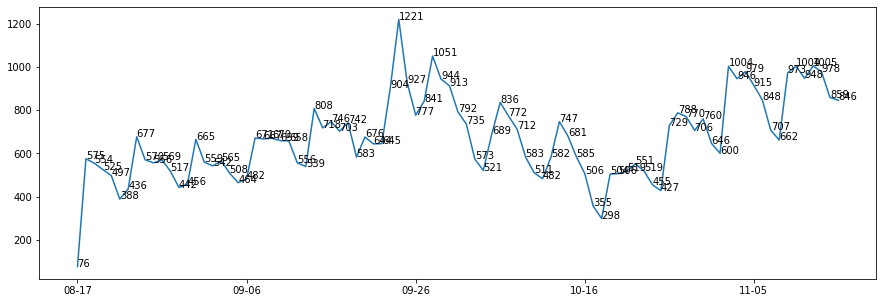

In [126]:
g = day_count.plot(figsize=(15, 5))

for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

In [140]:
#한글폰트 설정

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


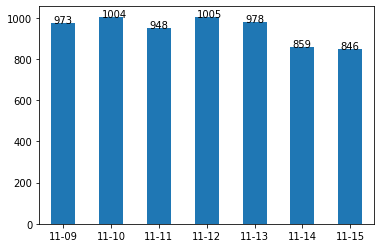

In [133]:
# 슬라이싱을 통해 최근 7일 데이터만 그립니다.


g = day_count[-7:].plot.bar(rot=0)

for i in range(7):
    case_count = day_count[-7:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.2, y=case_count, s=case_count)

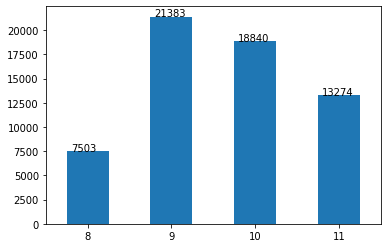

In [85]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


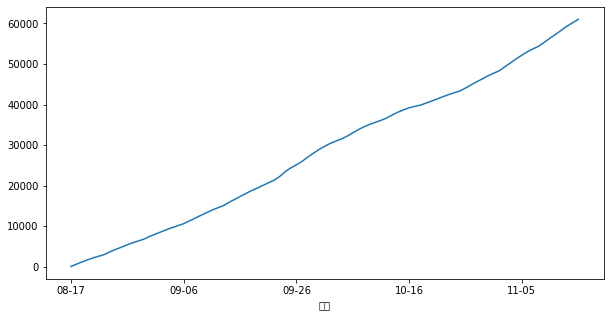

In [130]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
first_day = df.iloc[-1, 2]
last_day = df.iloc[0, 2]

# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)

# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})

# 확진일자별로 빈도수 구하기
daily_case = df["확진일"].value_counts()

# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.to_frame()

# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
df_daily_case.columns = ["확진수"]

# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", 
                        right_on=df_daily_case.index, how="left")

# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()

# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])

# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")

#누적확진 그래프
cum_day["누적확진"].plot(figsize=(10, 5))

In [136]:
#확진월, 요일
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek

# 월별, 요일별 확진수를 groupby로 구하기
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)

dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()

all_day_week.columns = dayofweek

# style.background_gradient 로 색상을 표현합니다.
all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
8,892,1418,1145,1110,1094,1014,830
9,2538,3174,3533,3775,3148,2835,2380
10,1728,2504,2877,2742,3346,3103,2540
11,2108,1977,1950,1927,1920,1826,1566


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_

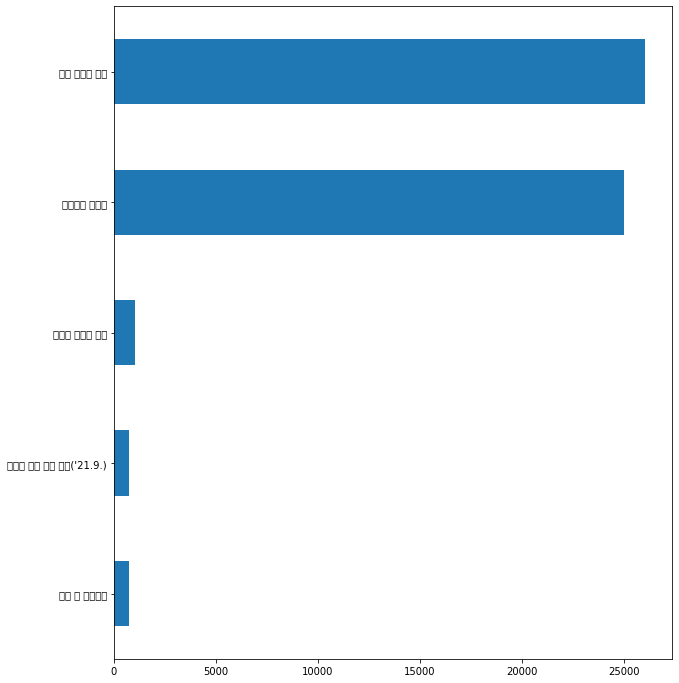

In [139]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

# 접촉력의 unique 값만 구합니다.
df["접촉력"].unique()

# "확인" 이 들어가는 접촉력만 찾습니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(5)
contact_count_top.plot.barh(figsize=(10, 12))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

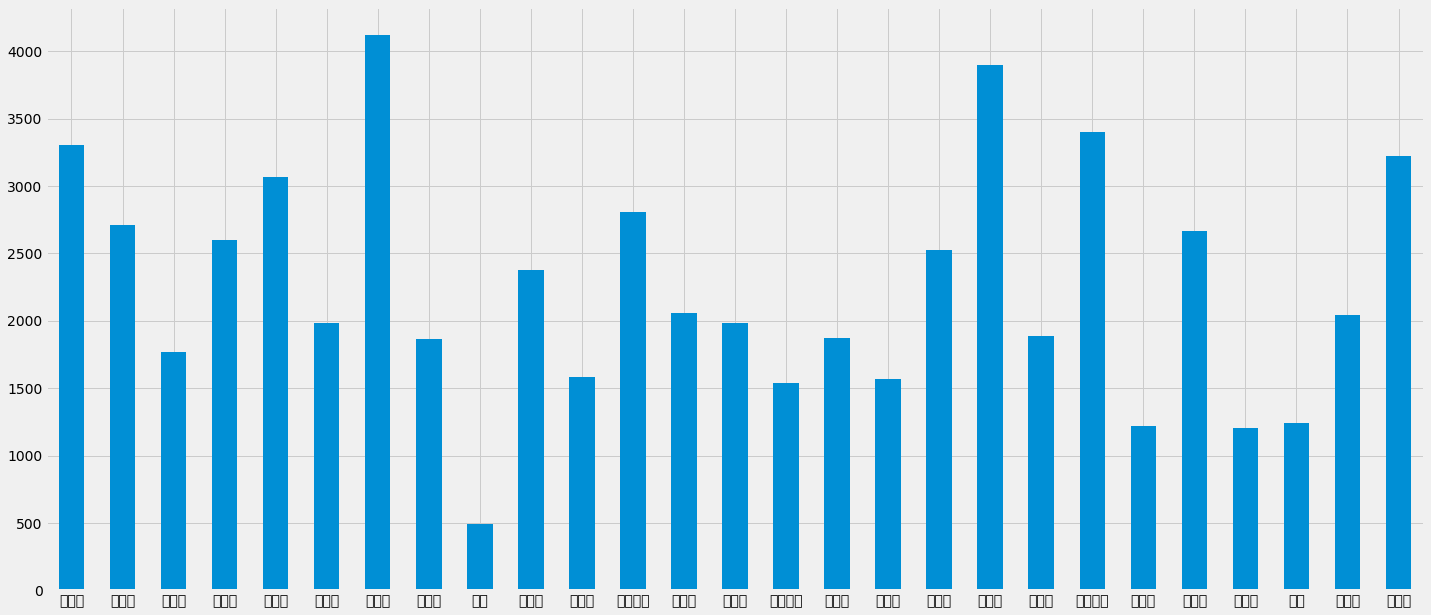

In [156]:
#거주지
gu_count = df_all["거주지"].value_counts().sort_index()
gu_count.plot.bar(rot=0,figsize=(22,10))